In [ ]:
!pip install pandas
!pip install sklearn

In [1]:
import pandas as pd
import numpy as np

In [2]:
heart = pd.read_csv('../data/heart_2020_cleaned.csv')

In [3]:
# convert all yes/no columns to bool
heart[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']] = \
    heart[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']].replace(['Yes', 'No'], value=[True, False])

heart[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']] = \
    heart[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']].astype(bool)

In [4]:
# associate int values to general health strings
heart['GenHealth'].replace(['Excellent', 'Very good', 'Good', 'Fair', 'Poor'], value=[4, 3, 2, 1, 0], inplace=True)
heart['GenHealth'] = heart['GenHealth'].astype(int)

In [5]:
heart['Sex'].replace(['Female', 'Male'], value=[0, 1], inplace=True)
heart['Sex'] = heart['Sex'].astype(int)

In [6]:
heart['Race'].replace(heart['Race'].unique(), value=list(range(0, len(heart['Race'].unique()))), inplace=True)
heart['Race'] = heart['Race'].astype(int)

In [7]:
categories = heart['AgeCategory'].unique()
categories.sort()
heart['AgeCategory'].replace(categories, value=list(range(0, len(categories))), inplace=True)
heart['AgeCategory'] = heart['AgeCategory'].astype(int)

In [8]:
heart.to_csv('../data/heart_cleaned.csv')

# Model training

In [8]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.utils import Bunch

In [9]:
heart_model_data = Bunch()
heart_model_data['target'] = heart['HeartDisease'].to_list()
heart.drop(columns=['HeartDisease'], inplace=True)
heart_model_data['data'] = heart.values.tolist()
heart_model_data['feature_names'] = heart.columns.to_list()
heart_model_data['target_names'] = ['No', 'Yes']

## K nearest neighbors (kNN) 

In [70]:
from sklearn import neighbors

In [244]:
LIMIT=1000

def try_neighbors():
    X = heart_model_data.data
    y = heart_model_data.target

    error_rate = []

    for i in range(1, 30):
        knn = neighbors.KNeighborsClassifier(n_neighbors=i)
        knn.fit(X, y)
        pred_i = knn.predict(X[:LIMIT])
        error_rate.append(np.mean(pred_i != y[:LIMIT]))

    return knn, error_rate

knn, error_rate = try_neighbors()

In [71]:
def try_neighbors():
    X = heart_model_data.data
    y = heart_model_data.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(X, y)

    return knn

knn = try_neighbors()

In [32]:
test = [[20, True, True, False, 0.0, 0.0, False, 0, 5, 0, False, True, 3, 7.0, False, False, False],  # didn't have
[28.87, True, False, False, 6.0, 0.0, True, 0, 11, 1, False, False, 1, 12.0, False, False, False] ] # had 

In [72]:
knn.predict_proba(test)

array([[1. , 0. ],
       [0.4, 0.6]])

In [10]:
import matplotlib.pyplot as plt

Legkisebb hiba: 0.0, ahol n_neighbours = 1


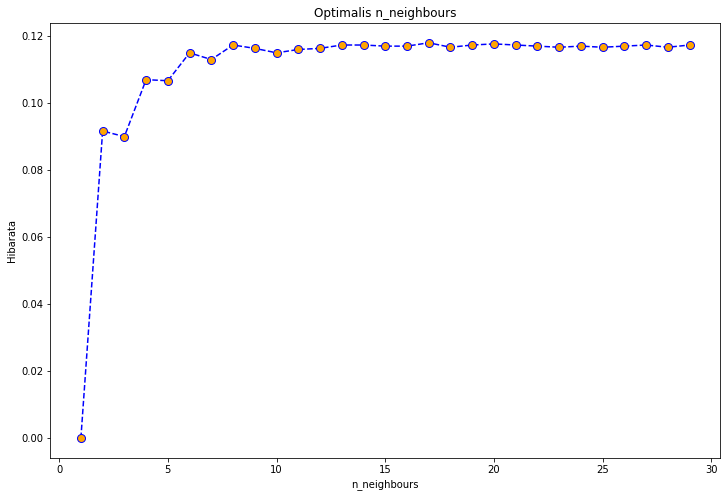

In [249]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 30), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='orange', markersize=8)
plt.title('Optimalis n_neighbours')
plt.xlabel('n_neighbours')
plt.ylabel('Hibarata')
req_k_value = error_rate.index(min(error_rate)) + 1
print(f'Legkisebb hiba: {min(error_rate)}, ahol n_neighbours = {req_k_value}')

## SVC

In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [77]:
def try_svc():
    X = heart_model_data.data
    y = heart_model_data.target

    svc = make_pipeline(StandardScaler(), SVC(max_iter=np.ceil(10**9 / len(heart_model_data.data)), probability=True))
    svc.fit(X, y)

    return svc

svc = try_svc()

C:\Users\rockd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3128).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [78]:
svc.predict_proba(test)

array([[0.926327  , 0.073673  ],
       [0.93060215, 0.06939785]])

## SGD

In [79]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [84]:
def try_SGD():
    X = heart_model_data.data
    y = heart_model_data.target

    clf = make_pipeline(StandardScaler(), SGDClassifier(loss='modified_huber', penalty='elasticnet', tol=1e-6, max_iter=np.ceil(10**8 / len(heart_model_data.data))))
    clf.fit(X, y)

    return clf

sgd = try_SGD()

In [89]:
sgd.predict_proba(test)

array([[1.       , 0.       ],
       [0.7685375, 0.2314625]])